#Build and Train the CNN Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import seaborn as sns

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(8, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(train_images, train_labels, epochs=100, validation_data=(test_images, test_labels))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,098 (35.54 KB)

 Trainable params: 9,098 (35.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 24ms/step - accuracy: 0.8486 - loss: 0.5084 - val_accuracy: 0.9726 - val_loss: 0.0912
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9750 - loss: 0.0811 - val_accuracy: 0.9817 - val_loss: 0.0519
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9817 - loss: 0.0592 - val_accuracy: 0.9852 - val_loss: 0.0470
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9846 - loss: 0.0500 - val_accuracy: 0.9829 - val_loss: 0.0503
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.9856 - loss: 0.0455 - val_accuracy: 0.9869 - val_loss: 0.0432
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 34ms/step - accuracy: 0.9880 - loss: 0.0367 - val_accuracy: 0.9854 - val_loss: 0.0440
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 0.9897 - loss: 0.0322 - val_accuracy: 0.9872 - val_loss: 0.0399
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 

#Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


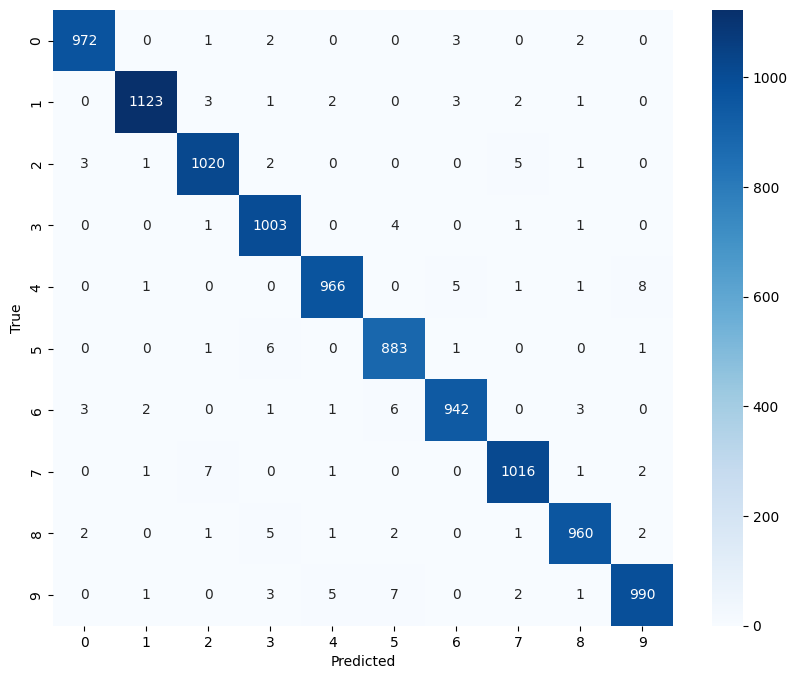

In [23]:
# Predict test set
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis=1)

# Plot confusion matrix
cm = confusion_matrix(test_labels, pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#Extract Features and Apply kNN

In [25]:
import tensorflow as tf
import numpy as np

def create_feature_extractor(trained_model):
    input_tensor = trained_model.layers[0].input

    flatten_output = trained_model.layers[-2].output

    extractor = tf.keras.Model(
        inputs=input_tensor,
        outputs=flatten_output
    )
    return extractor

feature_extractor = create_feature_extractor(model)
train_features = feature_extractor.predict(train_images, batch_size=128)
test_features = feature_extractor.predict(test_images, batch_size=128)

print("Input shape:", feature_extractor.input_shape)
print("Output shape:", feature_extractor.output_shape)

# KNN classifier (k=5, Euclidean distance)
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(train_features, train_labels)
knn_accuracy = knn.score(test_features, test_labels)
print(f"KNN Test Accuracy: {knn_accuracy:.4f}")

469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Input shape: (None, 28, 28, 1)
Output shape: (None, 784)
KNN Test Accuracy: 0.9863


#PCA Visualization (2D and 10D)


##2D Visualization

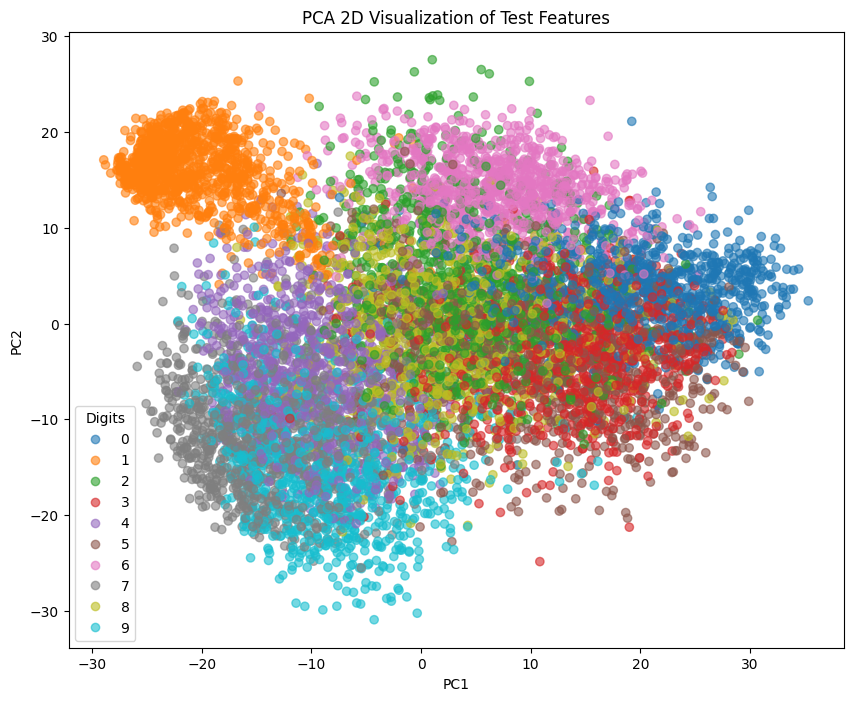

In [ ]:
# Reduce test features to 2D using PCA
pca = PCA(n_components=2)
test_pca = pca.fit_transform(test_features)

# Scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(test_pca[:, 0], test_pca[:, 1], c=test_labels, cmap='tab10', alpha=0.6)
plt.legend(*scatter.legend_elements(), title='Digits')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA 2D Visualization of Test Features')
plt.show()

##10D PCA + kNN

In [ ]:
# Reduce to 10D
pca = PCA(n_components=10)
train_pca = pca.fit_transform(train_features)
test_pca = pca.transform(test_features)

# kNN classification
knn.fit(train_pca, train_labels)
pca_knn_accuracy = knn.score(test_pca, test_labels)
print(f"PCA+kNN Test Accuracy: {pca_knn_accuracy:.4f}")

PCA+kNN Test Accuracy: 0.9647
